In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
adult = pd.read_csv('adult/adult1.data', header=None)
adult_test = pd.read_csv('adult/adult1.test', skiprows=[0], header=None)

x = adult.iloc[:,[x for x in range(adult.shape[1]) if x != 12]]
y = adult.iloc[:,12]

test_x = adult_test.iloc[:,[x for x in range(adult_test.shape[1]) if x != 12]]
test_y = adult_test.iloc[:,12]

print(x, y, test_x, test_y)

       0                  1       2            3   4                    5   \
0      39          State-gov   77516    Bachelors  13        Never-married   
1      50   Self-emp-not-inc   83311    Bachelors  13   Married-civ-spouse   
2      38            Private  215646      HS-grad   9             Divorced   
3      53            Private  234721         11th   7   Married-civ-spouse   
4      28            Private  338409    Bachelors  13   Married-civ-spouse   
...    ..                ...     ...          ...  ..                  ...   
30157  27            Private  257302   Assoc-acdm  12   Married-civ-spouse   
30158  40            Private  154374      HS-grad   9   Married-civ-spouse   
30159  58            Private  151910      HS-grad   9              Widowed   
30160  22            Private  201490      HS-grad   9        Never-married   
30161  52       Self-emp-inc  287927      HS-grad   9   Married-civ-spouse   

                       6               7       8        9      

In [4]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
    
ohe.fit(x)

X_train_ohe = ohe.transform(x).toarray()
test_X_ohe = ohe.transform(test_x).toarray()
print(test_X_ohe)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [5]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_ohe,y.values.ravel())
pred = knn.predict(test_X_ohe)
elapsed_time = time.time()-start

In [6]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
print(elapsed_time)
print(mean_absolute_percentage_error(test_y, pred))
print(mean_squared_error(test_y,pred))
print(r2_score(test_y,pred))

84.83383965492249
0.3346144890330114
208.7183930942895
-0.4344686050979203


Text(0, 0.5, 'Error Rate')

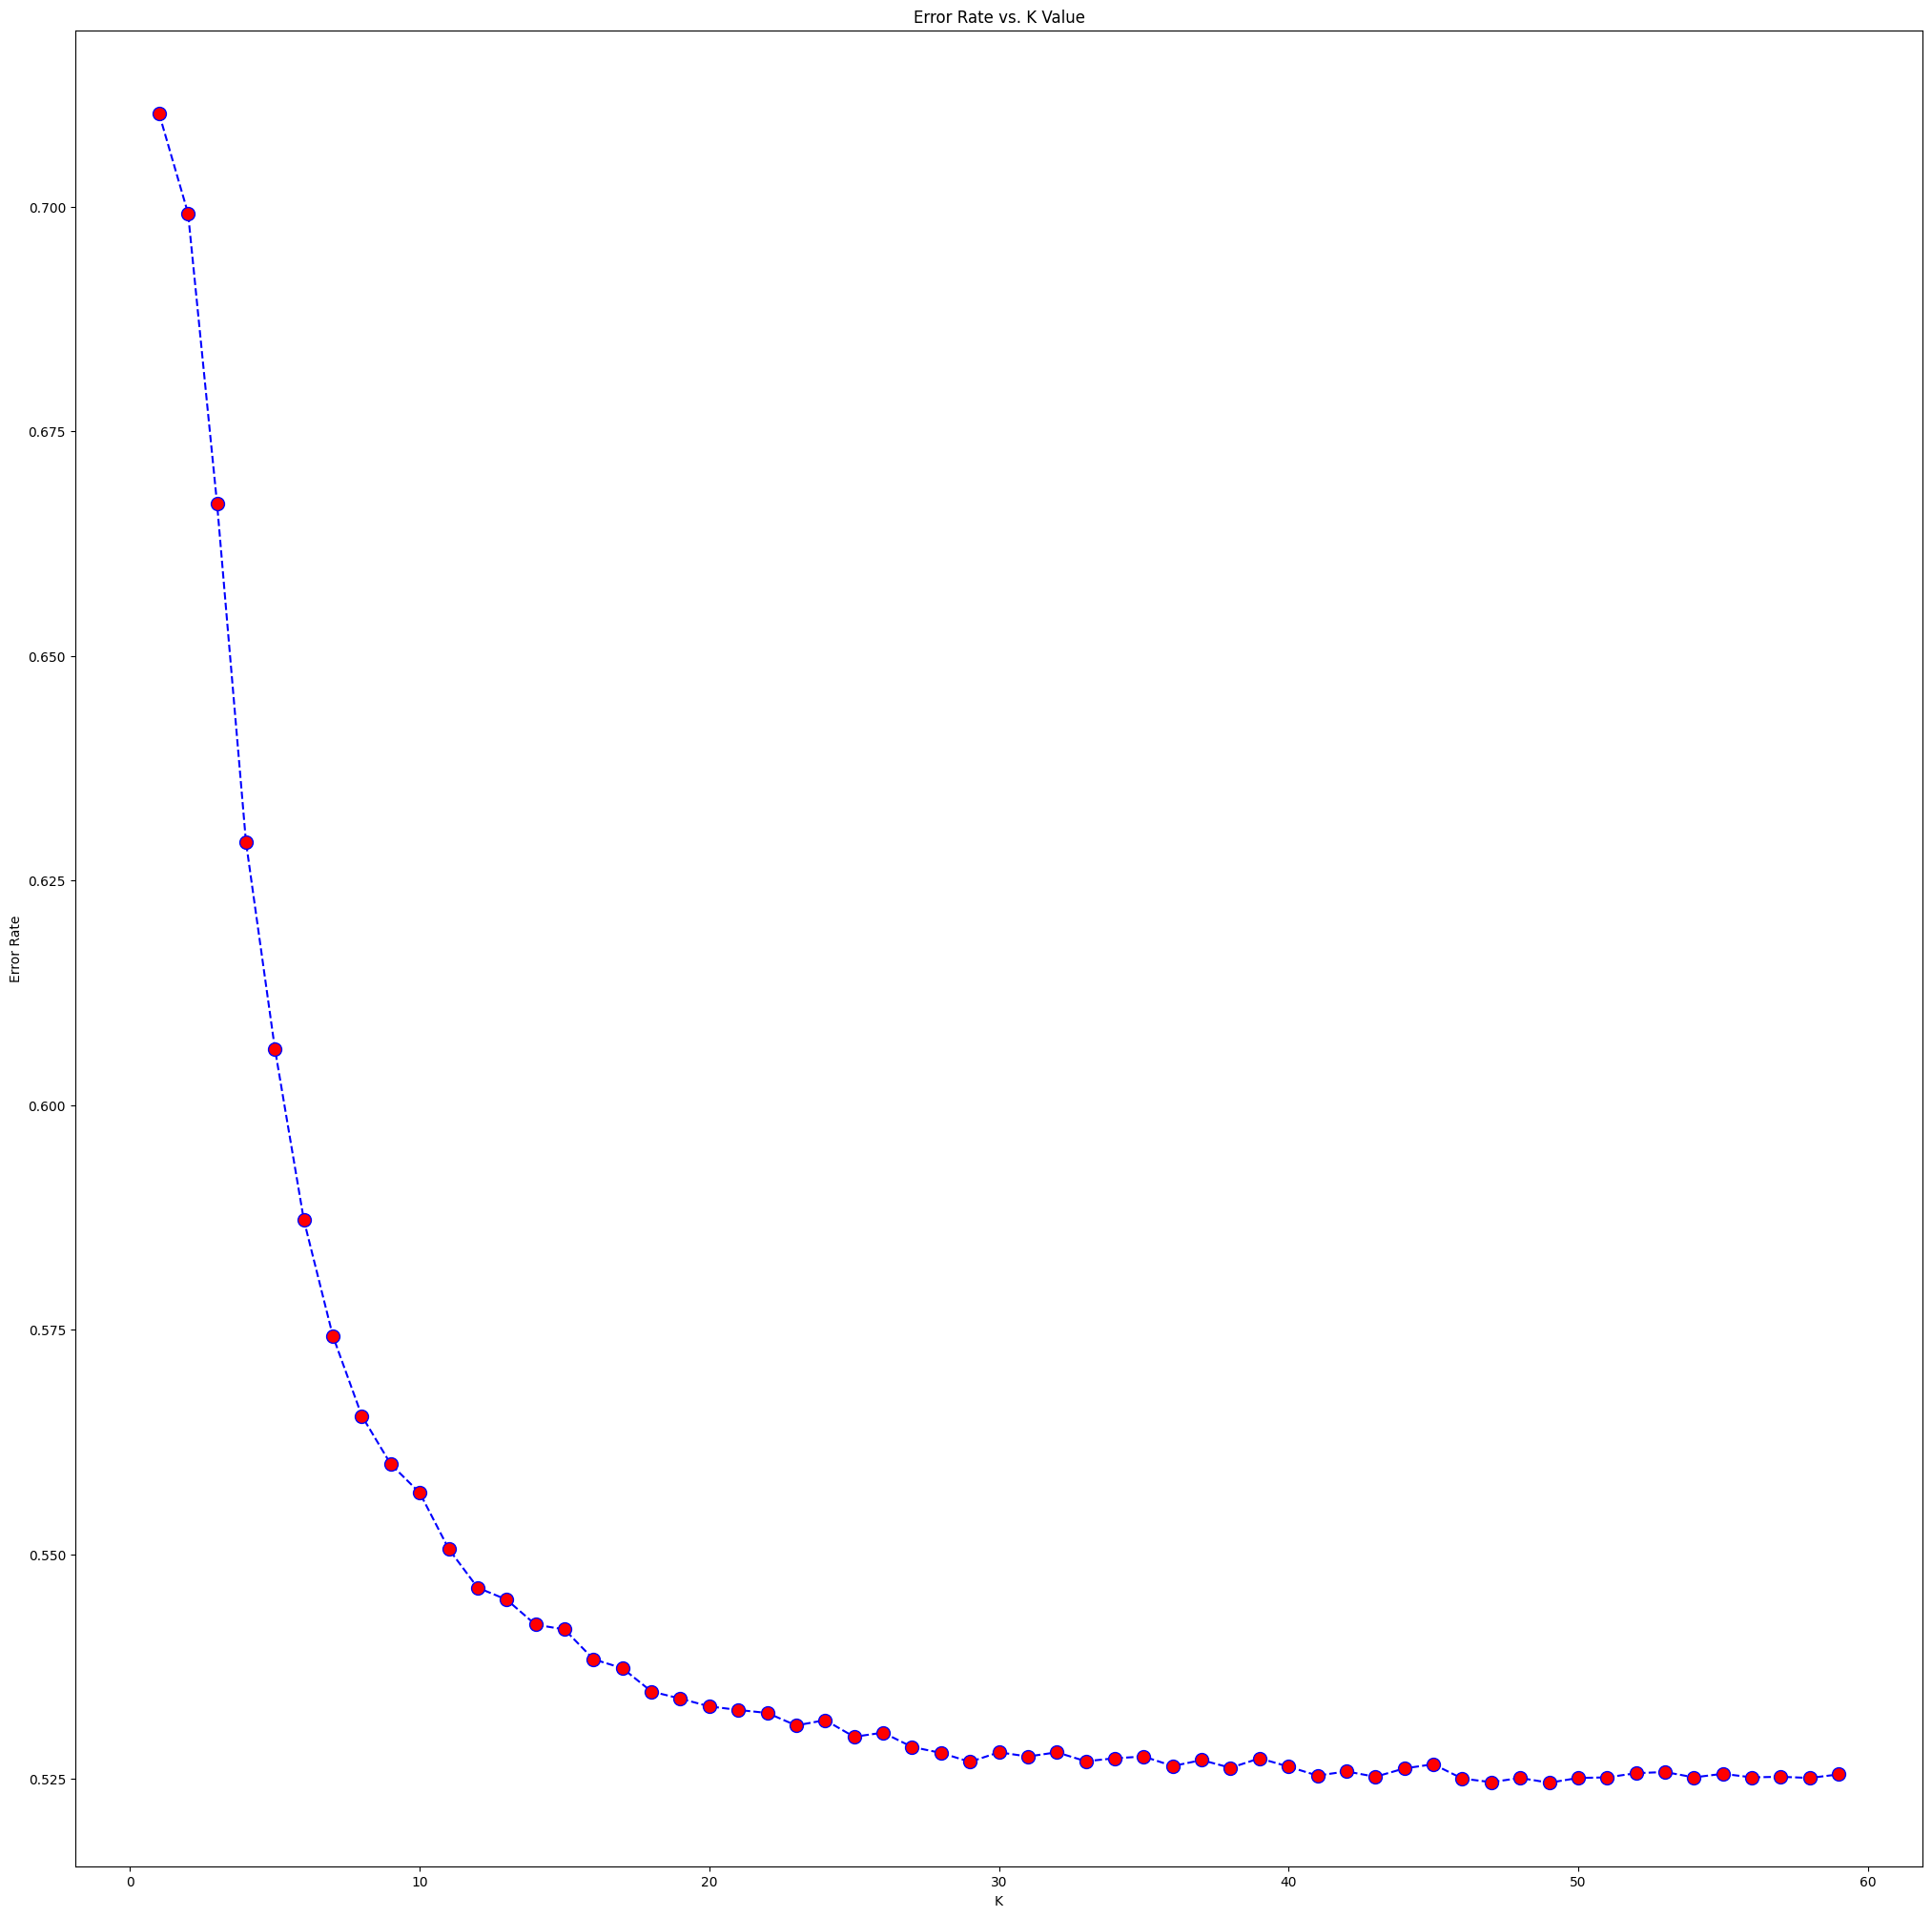

In [23]:
from sklearn.metrics import accuracy_score

error_rate = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_ohe,y.values.ravel())
    pred_i = knn.predict(test_X_ohe)
    error_rate.append(1. - accuracy_score(test_y,pred_i))

plt.figure(figsize=(25, 25))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:
print(np.min(np.array(error_rate)))

<built-in method min of numpy.ndarray object at 0x000001A29A39AA80>


In [7]:
start = time.time()
knn_23 = KNeighborsClassifier(n_neighbors=30)
knn_23.fit(X_train_ohe,y.values.ravel())
pred_23 = knn_23.predict(test_X_ohe)
elapsed_time = time.time()-start

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
print(elapsed_time)
print(mean_absolute_percentage_error(test_y, pred_23))
print(mean_squared_error(test_y,pred_23))
print(r2_score(test_y,pred_23))

83.30861353874207
0.2687282247580385
134.0730411686587
0.0785499759019378


In [15]:
knn_24 = KNeighborsClassifier(n_neighbors=24)
knn_24.fit(X_train_ohe,y.values.ravel())
pred_24 = knn_24.predict(test_X_ohe)
print(confusion_matrix(test_y,pred_24))
print(classification_report(test_y,pred_24))

[[10607   753]
 [ 1792  1908]]
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     11360
        >50K       0.72      0.52      0.60      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.72      0.75     15060
weighted avg       0.82      0.83      0.82     15060



In [16]:
knn_22 = KNeighborsClassifier(n_neighbors=22)
knn_22.fit(X_train_ohe,y.values.ravel())
pred_22 = knn_22.predict(test_X_ohe)
print(confusion_matrix(test_y,pred_22))
print(classification_report(test_y,pred_22))

[[10608   752]
 [ 1788  1912]]
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     11360
        >50K       0.72      0.52      0.60      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.73      0.75     15060
weighted avg       0.82      0.83      0.82     15060

